In [18]:
import pandas as pd
%pylab inline
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [96]:
# for i in rts ;do for j in BentCigarFunction KatsuuraEvaluation SchaffersEvaluation SphereEvaluation;do for k in `seq 0 99` ; do sed -i 's/^/'$i','$j','$k',/' ${i}-${j}_results/$k.csv;echo done $i $j $k ; done ; done ; done
# cat *_results/*.csv > big.csv
df=pd.read_csv('/Users/theofpa/Developer/evolutionary-computing/diversity-experiments/results1/big.csv',header=None,names=['method','fun','seed','generation','island_id','maximum_fitness','average_fitness','average_age','diversity'])

In [2]:
df=pd.DataFrame()
for i in ['baseline','gender','island','trs','taboo']:
    for j in ['BentCigarFunction','KatsuuraEvaluation','SchaffersEvaluation','SphereEvaluation']:
        for k in range(0,100):
            dfi=pd.read_csv('/Users/theofpa/Developer/evolutionary-computing/diversity-experiments/results/'+str(i)+'-'+str(j)+'_results/'+str(k)+'.csv',header=None,names=['generation','island_id','maximum_fitness','average_fitness','average_age','diversity'])
            dfi['seed']=k
            dfi['fun']=j
            dfi['method']=i
            df=df.append(dfi,ignore_index=True)

In [106]:
df=df[df['seed'] != 93]

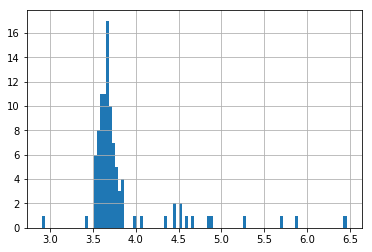

In [134]:
df[(df['fun']=='SchaffersEvaluation')&(df['method']=='baseline')].groupby('seed').mean()['diversity'].hist(bins=100)

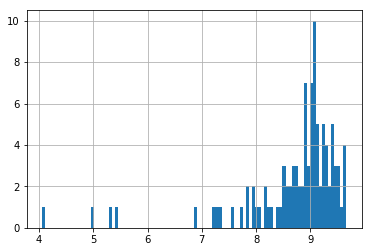

In [38]:
df[(df['fun']=='SchaffersEvaluation')&(df['method']=='gender')].groupby('seed').max()['maximum_fitness'].hist(bins=100)

In [122]:
results=pd.DataFrame()
methods=['baseline','gender','island','rts','taboo']
fun=['BentCigarFunction','KatsuuraEvaluation','SchaffersEvaluation','SphereEvaluation']
for i in range(1,5):
    for j in range(0,4):
        results=results.append(pd.DataFrame([[fun[j],methods[i],stats.wilcoxon(
            df[(df['fun']==fun[j])&(df['method']=='baseline')].groupby('seed').max()['maximum_fitness'],
            df[(df['fun']==fun[j])&(df['method']==methods[i])].groupby('seed').max()['maximum_fitness']
        ).pvalue]]))

In [129]:
results.columns=['function','method','pvalue']

In [150]:
print(results.sort_values('pvalue',ascending=False).to_latex())

\begin{tabular}{lllr}
\toprule
{} &             function &  method &        pvalue \\
\midrule
0 &  SchaffersEvaluation &  gender &  7.854355e-01 \\
0 &   KatsuuraEvaluation &  island &  2.655356e-01 \\
0 &  SchaffersEvaluation &   taboo &  1.271951e-01 \\
0 &    BentCigarFunction &  gender &  7.796860e-02 \\
0 &    BentCigarFunction &   taboo &  6.585891e-02 \\
0 &  SchaffersEvaluation &     rts &  3.113789e-03 \\
0 &  SchaffersEvaluation &  island &  5.799743e-05 \\
0 &    BentCigarFunction &  island &  7.365178e-08 \\
0 &     SphereEvaluation &  gender &  3.858550e-08 \\
0 &     SphereEvaluation &   taboo &  3.681486e-13 \\
0 &   KatsuuraEvaluation &  gender &  2.902327e-15 \\
0 &   KatsuuraEvaluation &     rts &  5.443446e-17 \\
0 &     SphereEvaluation &  island &  9.853561e-18 \\
0 &    BentCigarFunction &     rts &  6.436988e-18 \\
0 &     SphereEvaluation &     rts &  5.697221e-18 \\
0 &   KatsuuraEvaluation &   taboo &  5.697221e-18 \\
\bottomrule
\end{tabular}



In [143]:
diversity=pd.DataFrame()
methods=['baseline','gender','island','rts','taboo']
fun=['BentCigarFunction','KatsuuraEvaluation','SchaffersEvaluation','SphereEvaluation']
for i in range(1,5):
    for j in range(0,4):
        diversity=diversity.append(pd.DataFrame([[fun[j],methods[i],stats.wilcoxon(
            df[(df['fun']==fun[j])&(df['method']=='baseline')].groupby('seed').mean()['diversity'],
            df[(df['fun']==fun[j])&(df['method']==methods[i])].groupby('seed').mean()['diversity']
        ).pvalue]]),ignore_index=True)

In [144]:
diversity.columns=['function','method','pvalue']

In [154]:
print(diversity.sort_values('pvalue',ascending=False).to_latex())

\begin{tabular}{lllr}
\toprule
{} &             function &  method &        pvalue \\
\midrule
2  &  SchaffersEvaluation &  gender &  3.623135e-01 \\
12 &    BentCigarFunction &   taboo &  3.389008e-01 \\
14 &  SchaffersEvaluation &   taboo &  8.467118e-02 \\
0  &    BentCigarFunction &  gender &  1.042236e-07 \\
6  &  SchaffersEvaluation &  island &  8.272353e-08 \\
15 &     SphereEvaluation &   taboo &  6.597503e-09 \\
3  &     SphereEvaluation &  gender &  9.121435e-16 \\
1  &   KatsuuraEvaluation &  gender &  1.011741e-16 \\
4  &    BentCigarFunction &  island &  6.243608e-18 \\
5  &   KatsuuraEvaluation &  island &  6.055965e-18 \\
7  &     SphereEvaluation &  island &  5.697221e-18 \\
8  &    BentCigarFunction &     rts &  5.697221e-18 \\
9  &   KatsuuraEvaluation &     rts &  5.697221e-18 \\
10 &  SchaffersEvaluation &     rts &  5.697221e-18 \\
11 &     SphereEvaluation &     rts &  5.697221e-18 \\
13 &   KatsuuraEvaluation &   taboo &  5.697221e-18 \\
\bottomrule
\end{tabular}

In [73]:
stats.ttest_ind(df[(df['fun']=='BentCigarFunction')&(df['method']=='baseline')].groupby('seed').max()['maximum_fitness'],
                df[(df['fun']=='BentCigarFunction')&(df['method']=='gender')].groupby('seed').max()['maximum_fitness'])

Ttest_indResult(statistic=-0.344321127335534, pvalue=0.7309720685188259)